<a href="https://colab.research.google.com/github/v2047/ML-health-premium-predication/blob/main/Healthcare_Premium_Predicion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project: Health Premium Prediction (Regression)**

**Overview**:

AtliQ AI will develop a predictive model for Shield Insurance to estimate health insurance premiums based on factors like age, smoking habits, BMI, and medical history. The project has
two phases:
1. Phase 1 (MVP): Build and deploy a predictive model with a Streamlit application.
2. Phase 2: Develop infrastructure for straight-through processing (STP) of insurance quotes
(detailed planning and estimation for this phase will be done later).

----------------------------------------------------------------------


**Objective:**
Develop a high-accuracy (>97%) predictive model. The percentage difference between the predicted and actual value on a minimum of 95% of the errors should be less than 10%.
Deploy the model in the cloud so that an insurance underwriter can run it from anywhere.
Create an interactive Streamlit application that an underwriter can use for predictions.






In [ ]:
# Import the necessary libaries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [ ]:
# Load the data
premiums_data = pd.read_excel('/content/drive/MyDrive/DataSet/premiums.xlsx')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# display the Top 5 data
premiums_data.head()

,Age,Gender,Region,Marital_status,Number Of Dependants,BMI_Category,Smoking_Status,Employment_Status,Income_Level,Income_Lakhs,Medical History,Insurance_Plan,Annual_Premium_Amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365


In [ ]:
# Shape of the data
premiums_data.shape  #(50000 rows , 13 cols)

(50000, 13)

In [ ]:
# display all the columns name
premiums_data.columns

Index(['Age', 'Gender', 'Region', 'Marital_status', 'Number Of Dependants',
       'BMI_Category', 'Smoking_Status', 'Employment_Status', 'Income_Level',
       'Income_Lakhs', 'Medical History', 'Insurance_Plan',
       'Annual_Premium_Amount'],
      dtype='object')

In [ ]:
# As we obsever that the col names is not in same format(naming convention), so replace the space with '_'
premiums_data.columns = premiums_data.columns.str.replace(' ', '_').str.lower()


In [ ]:

premiums_data.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339


In [ ]:
# changing the columns name into lower case

#premiums_data.columns.str.replace(' ', '_').str.lower()


#Data Cleaning & EDA


**Handle missing/NA values**


In [ ]:
premiums_data.isna().sum()

,0
age,0
gender,0
region,0
marital_status,0
number_of_dependants,0
bmi_category,0
smoking_status,11
employment_status,2
income_level,13
income_lakhs,0


If missing value rate is less compared to entire dataset, drop the missing value.
If it's larger than replace NA value with mean/median/mode as per requiremnet.


In [ ]:
# Droping the NA?missing value as it's very low as compaed to dataset
premiums_data.dropna(inplace=True)
premiums_data.isna().sum() # validating again


,0
age,0
gender,0
region,0
marital_status,0
number_of_dependants,0
bmi_category,0
smoking_status,0
employment_status,0
income_level,0
income_lakhs,0


**Validating the duplicate values**

In [ ]:
premiums_data.duplicated().sum()

# To handle the duplicate value
premiums_data.drop_duplicates(inplace=True)
premiums_data.duplicated().sum()

0

In [ ]:
premiums_data.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49976.000000,49976.000000,49976.000000,49976.000000
mean,34.591764,1.711842,23.021150,15766.810189
std,15.000378,1.498195,24.221794,8419.995271
min,18.000000,-3.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8607.750000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22273.500000
max,356.000000,5.000000,930.000000,43471.000000


Based on the statistics provided, the average age is 34, with a minimum of 18 and a maximum of 356. The maximum age of 356 seems implausible, indicating there may be errors or outliers in the data.

Additionally, the number of dependents cannot be negative (-3), and an income of 9.30 crore is exceptionally rare. Further analysis is needed to address these issues.

In [ ]:
# Analysis on No of dependants
#display the nunmber of dependants which is having negative value

premiums_data[premiums_data.number_of_dependants < 0].shape

(72, 13)

In [ ]:
# display all the value which is negative

premiums_data[premiums_data.number_of_dependants < 0]['number_of_dependants'].unique()

array([-3, -1])

Based on the data, it’s possible that these values are errors, such as negative numbers that may have been mistakenly entered. We should discuss these issues with the data collection team to clarify any assumptions or correct the values. If the negative values are indeed errors, we can adjust them to positive values.






In [ ]:
# To change these value into positive number
premiums_data['number_of_dependants'] = abs(premiums_data['number_of_dependants'])
# validate the changes
premiums_data['number_of_dependants'].describe()

,number_of_dependants
count,49976.000000
mean,1.717284
std,1.491953
min,0.000000
25%,0.000000
50%,2.000000
75%,3.000000
max,5.000000


# Outliers


Visulaize the outliers for all the numeric values.



In [ ]:
# Get all the numeric columns
numeric_col = premiums_data.select_dtypes(['float64', 'int64']).columns
numeric_col

Index(['age', 'number_of_dependants', 'income_lakhs', 'annual_premium_amount'], dtype='object')

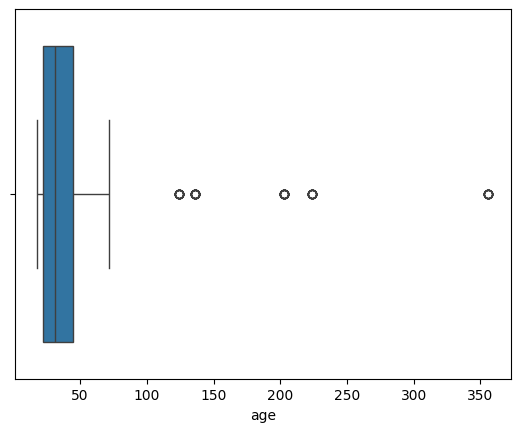

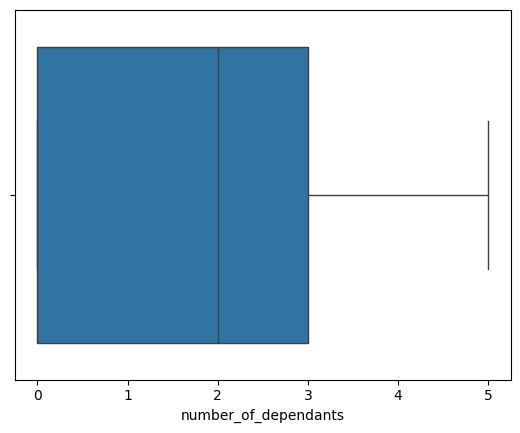

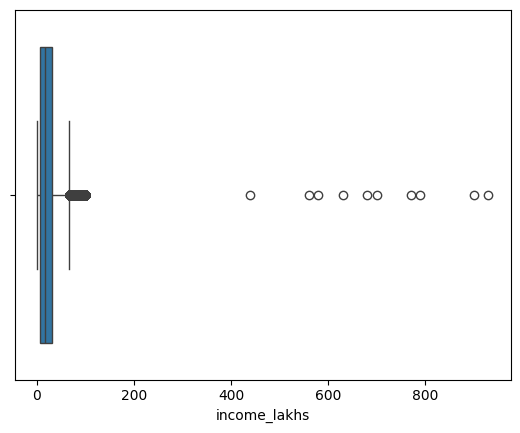

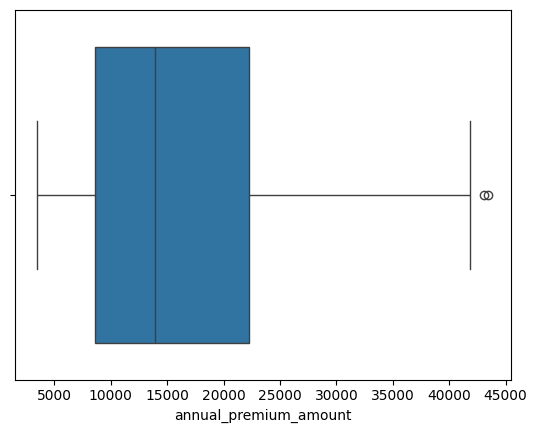

In [ ]:
# plot the boxplot for all numeric col to visualize the outliers

for col in numeric_col:
  sns.boxplot(x=premiums_data[col])
  plt.show()



Based on the graphs, we can see that both age and income (in lakhs) have numerous outliers. In contrast, the annual premium amount shows one or two outliers, which we can consider removing/dropping. The number of dependents does not exhibit any outliers.


In [ ]:
# Analysis on Age (According to common sense, we can set a maximum threshold of 100 for age.)
premiums_data[premiums_data.age>100]['age'].unique()

array([224, 124, 136, 203, 356])

Given the age values observed, we can eliminate those exceeding 100, as it is extremely rare for a person to be that age or older.

In [ ]:
 premiums_data1 = premiums_data[premiums_data.age<=100].copy()
 premiums_data1.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49918.000000,49918.000000,49918.000000,49918.000000
mean,34.401839,1.717617,23.025141,15766.589286
std,13.681600,1.492074,24.227912,8419.137327
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22272.000000
max,72.000000,5.000000,930.000000,43471.000000


We can now observe that the maximum age is 72.


**Analysis on income col**

<Axes: xlabel='income_lakhs', ylabel='Count'>

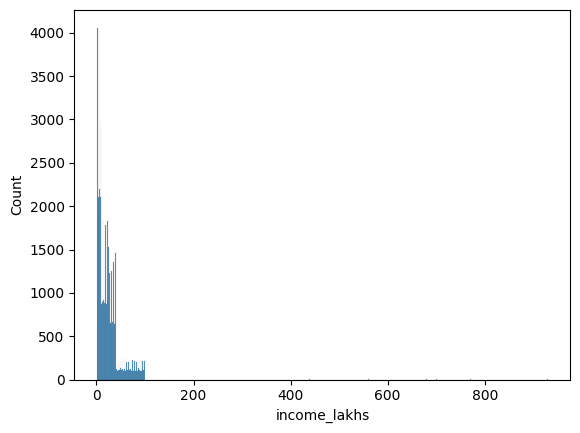

In [ ]:
sns.histplot(premiums_data1.income_lakhs)

The distribution indicates that most incomes fall between 0 and 100 lakhs, with a few outliers.
Address these outliers using the IQR (Interquartile Range) method.

In [ ]:
premiums_data1.income_lakhs.quantile([0.25,0.75])


,income_lakhs
0.25,7.0
0.75,31.0


In [ ]:
def get_iqr_bounds(col):
  Q1, Q3 = col.quantile([0.25,0.75])
  IQR = Q3-Q1
  lower_bound = Q1-1.5*IQR
  upper_bound = Q3 + 1.5*IQR
  return lower_bound, upper_bound

In [ ]:
get_iqr_bounds(premiums_data1.income_lakhs)

(-29.0, 67.0)

We don't need to be too concerned with the lower bound since the minimum value is 1, and there are no errors in that range. For the upper bound, we can consider 67 lakhs as it isn’t excessively high. For further confirmation, we can discuss with the business and make adjustments as needed.

In [ ]:
quantile_thresold = premiums_data1.income_lakhs.quantile(0.999)
quantile_thresold

100.0

In [ ]:
premiums_data1[premiums_data1.income_lakhs > quantile_thresold].shape

(10, 13)

In [ ]:
# to adjust the outliers reverse the conditions
premiums_data2 = premiums_data1[premiums_data1.income_lakhs <= quantile_thresold].copy()
premiums_data2.describe()

,age,number_of_dependants,income_lakhs,annual_premium_amount
count,49908.000000,49908.000000,49908.000000,49908.000000
mean,34.401579,1.717640,22.889897,15765.739641
std,13.681604,1.492032,22.170699,8418.674061
min,18.000000,0.000000,1.000000,3501.000000
25%,22.000000,0.000000,7.000000,8608.000000
50%,31.000000,2.000000,17.000000,13928.000000
75%,45.000000,3.000000,31.000000,22270.500000
max,72.000000,5.000000,100.000000,43471.000000


We can now observe that maximun income in reasonable range(100)  


In [ ]:
#sns.histplot(premiums_data2['income_lakhs'], kde=True)

To plot or visualize the distribution for all numeric columns to gain better clarification.

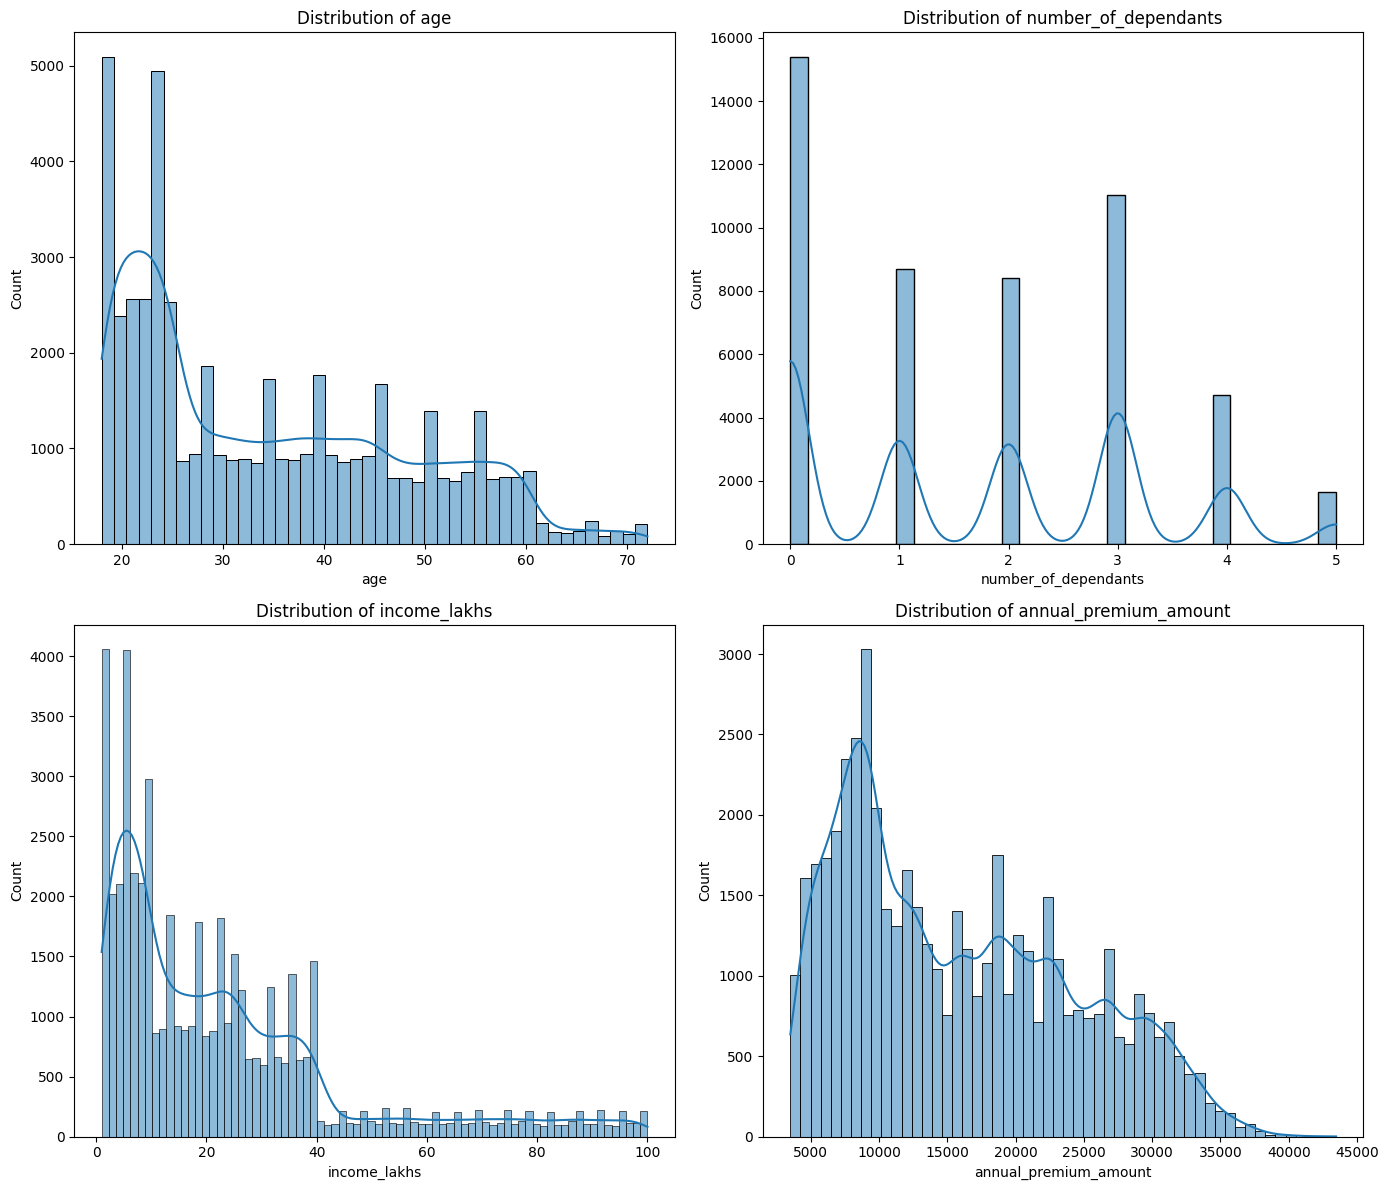

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))  # Adjust figsize as needed

# Plot each numeric column
for i, col in enumerate(numeric_col):
    row, col_idx = divmod(i, 2)  # Determine the row and column index
    sns.histplot(data=premiums_data2, x=col, kde=True, ax=axes[row, col_idx])
    axes[row, col_idx].set_title(f'Distribution of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

After removing and adjusting for outliers, we can visualize the data more effectively.


# Visualization

Visualize the numeric columns data using scatterplot

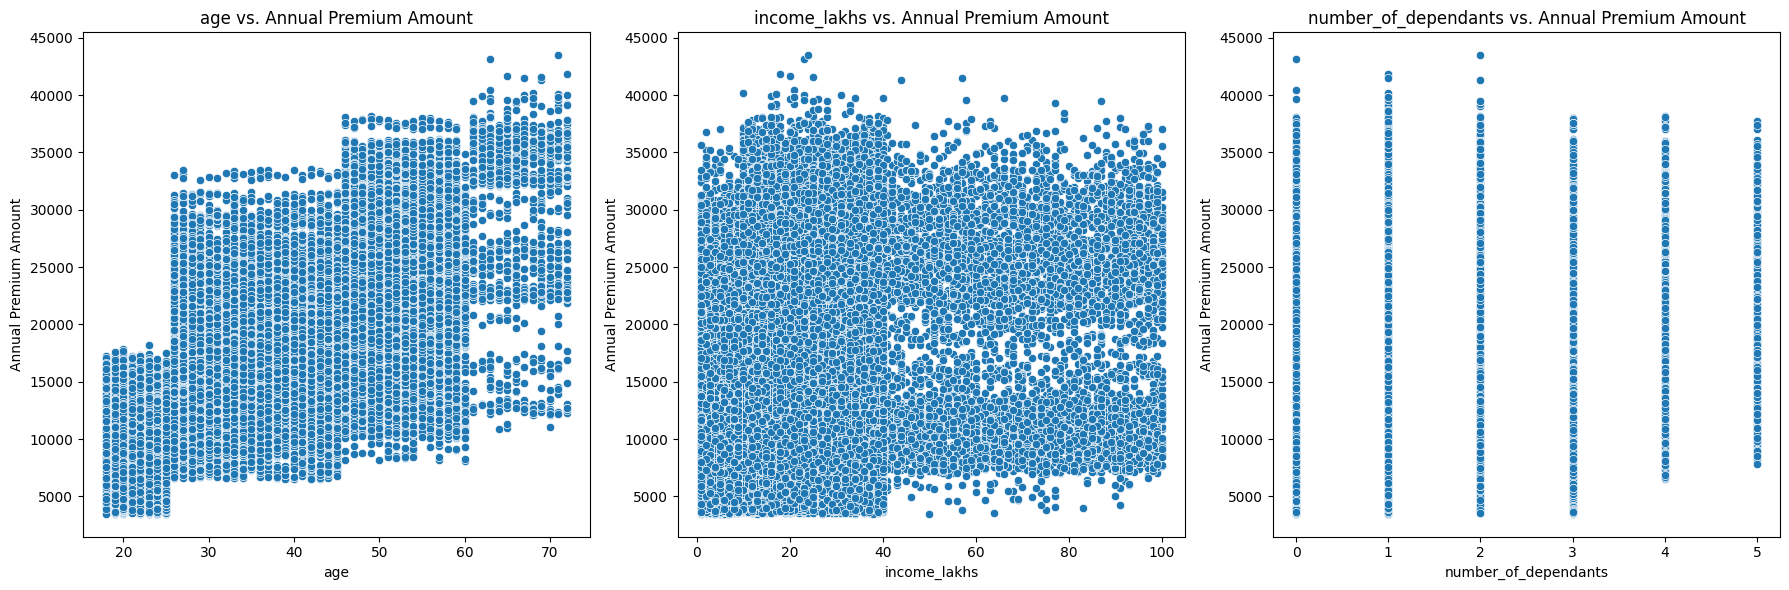

In [ ]:
numeric_features = ['age', 'income_lakhs', 'number_of_dependants']

fig, axes = plt.subplots(1, len(numeric_features), figsize=(18,6))  # Adjust figsize as needed

# Plot each numeric column vs annual premium
for ax, col in zip(axes, numeric_features):
   sns.scatterplot(x=premiums_data2[col], y=premiums_data2['annual_premium_amount'], ax=ax)
   ax.set_title(f'{col} vs. Annual Premium Amount')
   ax.set_xlabel(col)
   ax.set_ylabel('Annual Premium Amount')

# Adjust layout
plt.tight_layout()
plt.show()




Based on the graph above, it’s evident that as age increases, the annual premium amount also increases. However, the relationships between income and the number of dependents with the annual premium amount are less clear. Further analysis may be needed to explore these variables in more detail.

# Analysis of Categorical Data

In [ ]:
categorical_cols = premiums_data.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status',
       'employment_status', 'income_level', 'medical_history',
       'insurance_plan'],
      dtype='object')

In [ ]:
for col in categorical_cols:
  print(col,":", premiums_data2[col].unique())

gender : ['Male' 'Female']
region : ['Northwest' 'Southeast' 'Northeast' 'Southwest']
marital_status : ['Unmarried' 'Married']
bmi_category : ['Normal' 'Obesity' 'Overweight' 'Underweight']
smoking_status : ['No Smoking' 'Regular' 'Occasional' 'Smoking=0' 'Does Not Smoke'
 'Not Smoking']
employment_status : ['Salaried' 'Self-Employed' 'Freelancer']
income_level : ['<10L' '10L - 25L' '> 40L' '25L - 40L']
medical_history : ['Diabetes' 'High blood pressure' 'No Disease'
 'Diabetes & High blood pressure' 'Thyroid' 'Heart disease'
 'High blood pressure & Heart disease' 'Diabetes & Thyroid'
 'Diabetes & Heart disease']
insurance_plan : ['Bronze' 'Silver' 'Gold']


After reviewing the data, it’s clear that all categorical values are consistent except for the "smoking status" category. The values are not uniform, including variations like "no smoking," "smoking = 0," "Does Not Smoke," and "not smoking," all of which should represent the same non-smoking status.

In [ ]:
# To make the uniform data for smoking status column
premiums_data2['smoking_status'].replace({'Smoking=0': 'No Smoking','Does Not Smoke': 'No Smoking', 'Not Smoking' : 'No Smoking'
 }, inplace=True)
premiums_data2['smoking_status'].unique()

array(['No Smoking', 'Regular', 'Occasional'], dtype=object)

**Univariate analysis**

In [ ]:
# univariate analysis for gender columns
premiums_data2['gender'].value_counts

<bound method IndexOpsMixin.value_counts of 0          Male
1        Female
2        Female
3        Female
4          Male
          ...  
49995    Female
49996    Female
49997      Male
49998      Male
49999    Female
Name: gender, Length: 49908, dtype: object>

In [ ]:
# To calculate the percentage
pct_count = premiums_data2['gender'].value_counts(normalize=True)
pct_count

,proportion
gender,
Male,0.549631
Female,0.450369


<Axes: xlabel='gender'>

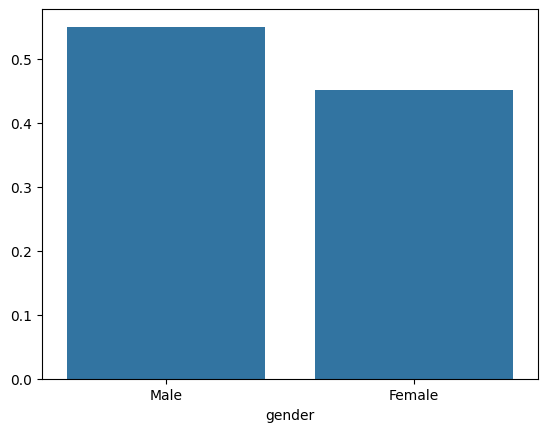

In [ ]:
sns.barplot(x=pct_count.index, y=pct_count.values)  #index gives male and female index

**We need to conduct the above univariate analysis for all categorical columns, so let's proceed accordingly.**


<ipython-input-39-221bc4c96998>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-39-221bc4c96998>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-39-221bc4c96998>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-39-221bc4c96998>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-39-221bc4c96998>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
<ipython-input-39-221bc4c96998>:14: UserWarning: FixedFormatter should only be used together with FixedLo

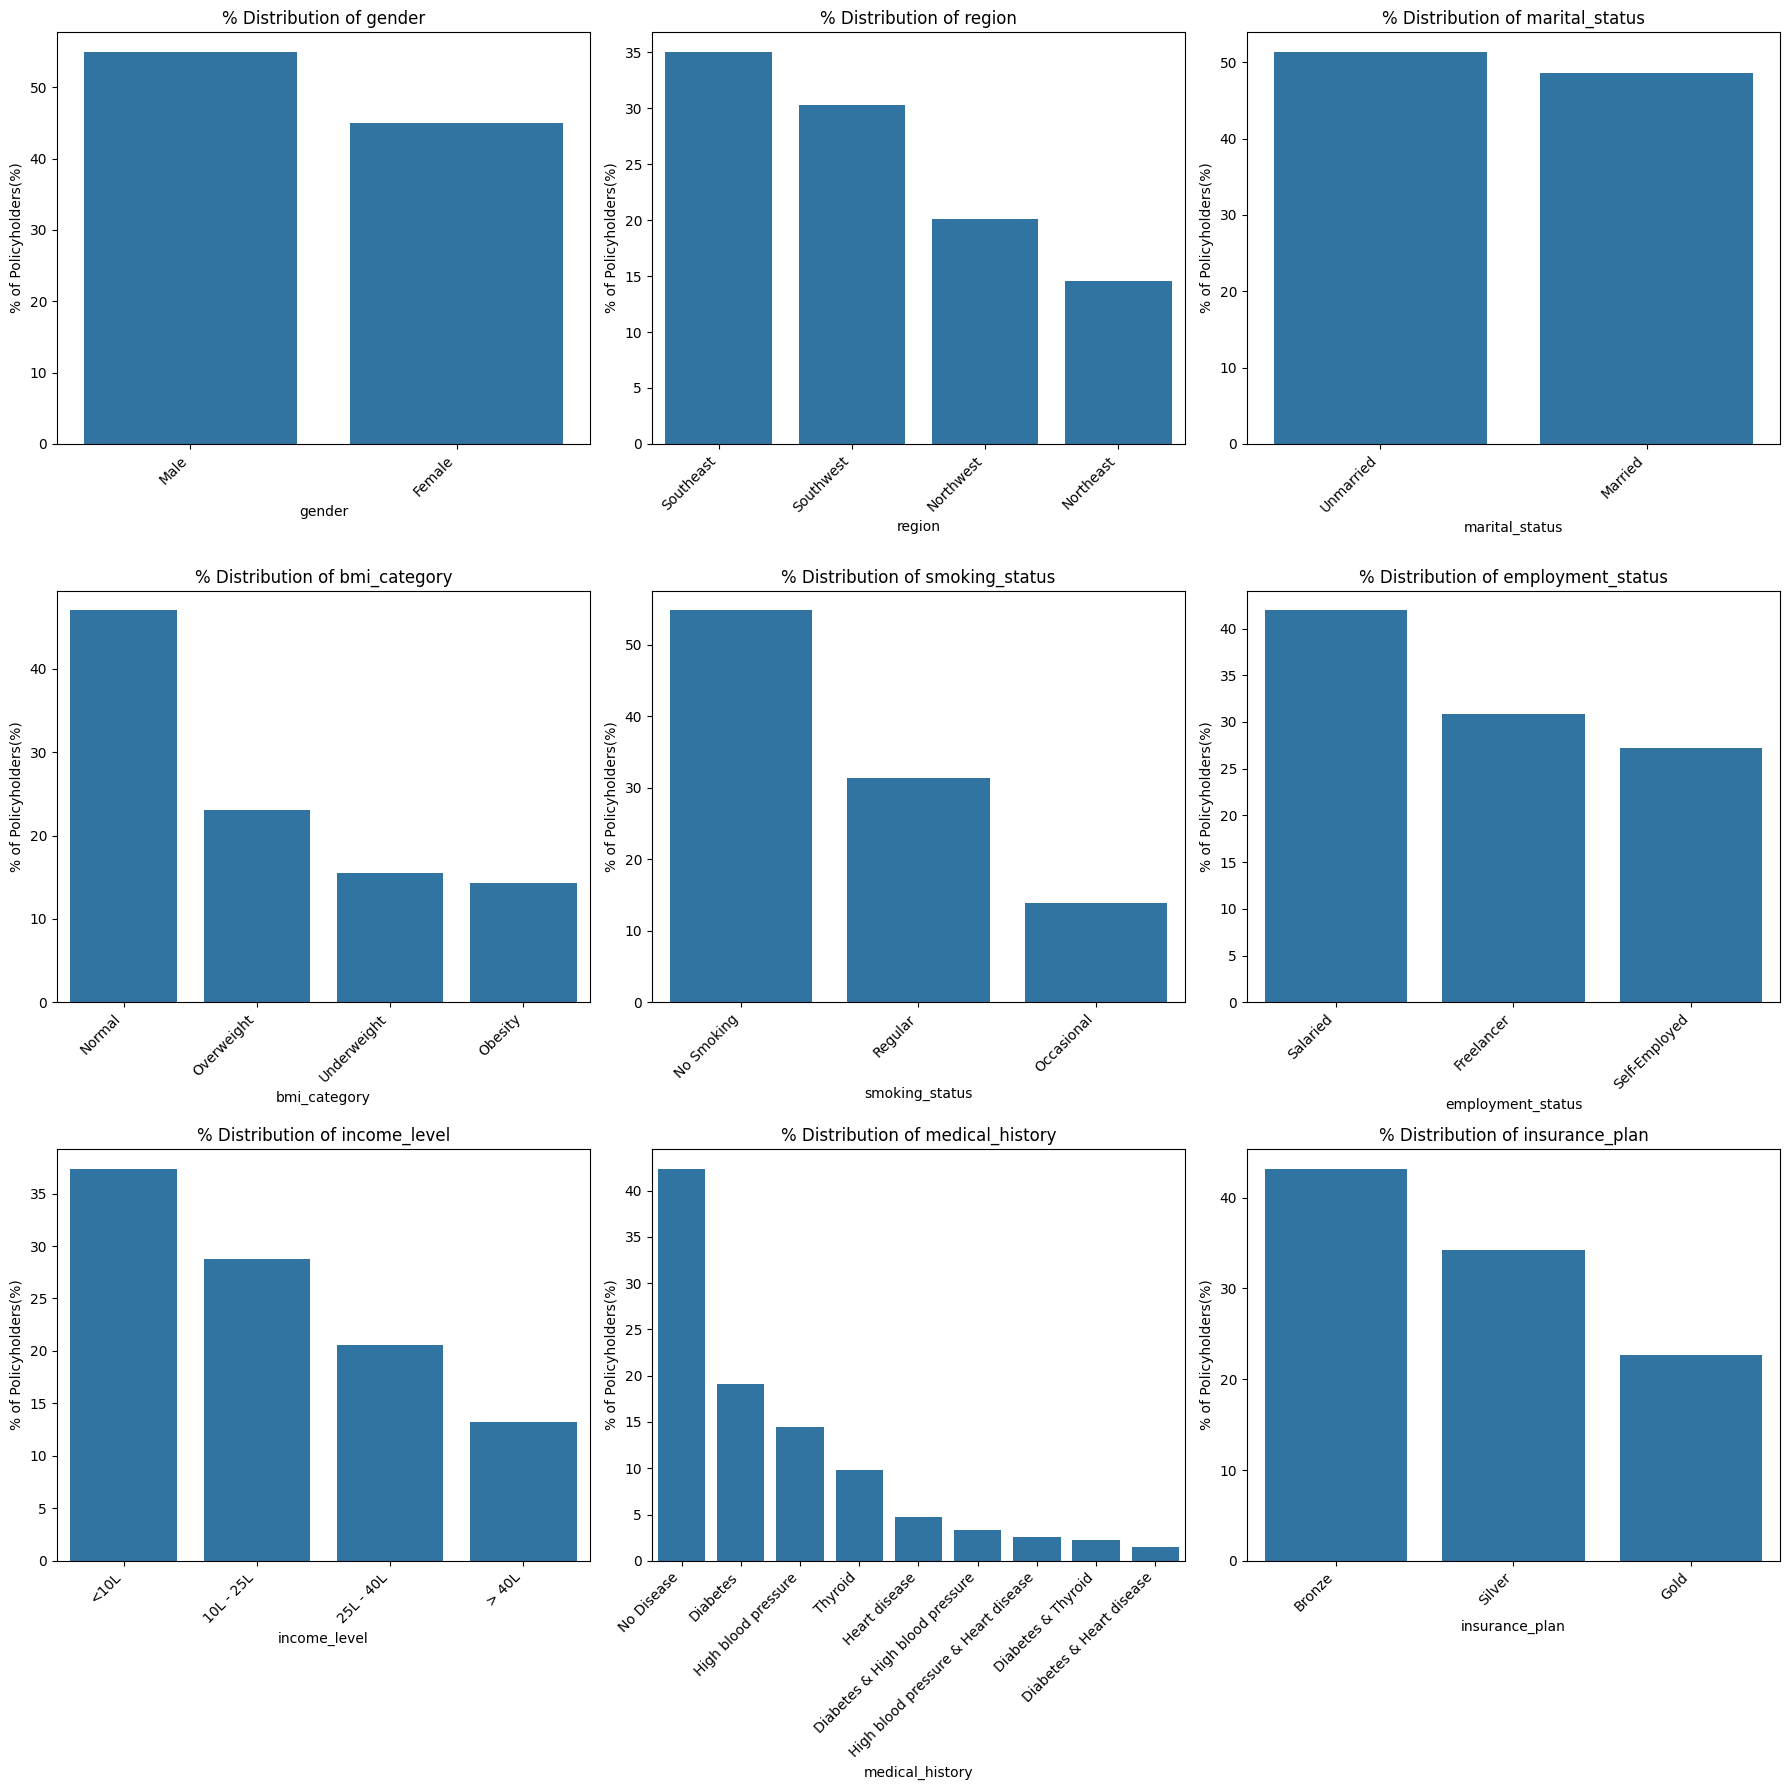

In [ ]:
fig, axes = plt.subplots(3,3, figsize=(18,18))  # Adjust figsize as needed
axes = axes.flatten()


# Plot each numeric column vs annual premium
for ax, col in zip(axes,categorical_cols):
  #calcullate the percentage distriibution of each category
  category_counts = premiums_data2[col].value_counts(normalize=True) * 100
  sns.barplot(x=category_counts.index, y=category_counts.values, ax=ax)
  ax.set_title(f'% Distribution of {col}')
  ax.set_xlabel(col)
  ax.set_ylabel('% of Policyholders(%)')
  # Rotate x labels to prevent overlap
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()



**Bivariate analysis:**

Bivariate analysis is a statistical method used to explore the relationship between two variables.

In [ ]:
# using crostab function we can explore the relationship between two variables
crosstab = pd.crosstab(premiums_data2['income_level'], premiums_data2['insurance_plan'])
crosstab

insurance_plan,Bronze,Gold,Silver
income_level,,,
10L - 25L,5307,3880,5182
25L - 40L,3683,2840,3750
<10L,12226,931,5486
> 40L,329,3653,2641


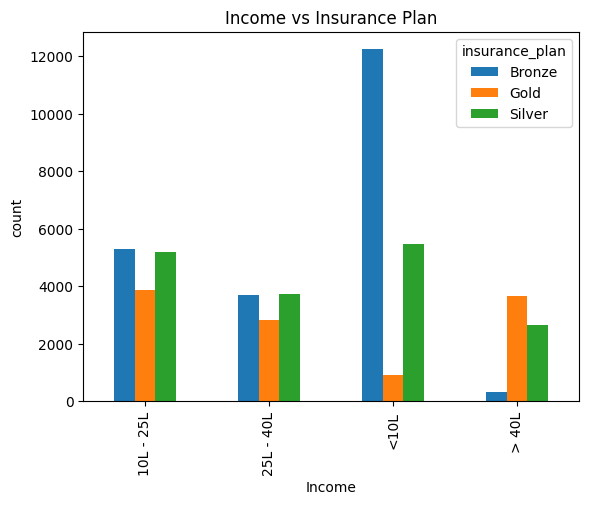

In [ ]:
# plotting graph
crosstab.plot(kind = "bar")
#crosstab.plot(kind = "bar", stacked = True)
plt.title('Income vs Insurance Plan')
plt.xlabel('Income')
plt.ylabel('count')

plt.show()

Another approach to visualize the relationships in the above analysis is by using a heatmap, which can provide clearer insights in my perspective.

<Axes: xlabel='insurance_plan', ylabel='income_level'>

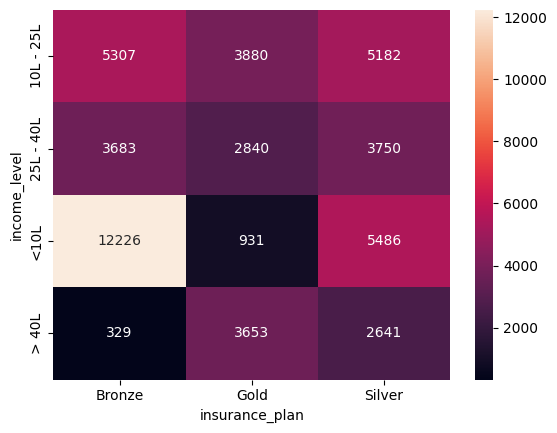

In [ ]:
sns.heatmap(crosstab , annot = True, fmt= 'd' )

# Feature Engineering


In [ ]:
premiums_data2.head(2)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339


In [ ]:
premiums_data2.medical_history.unique()

array(['Diabetes', 'High blood pressure', 'No Disease',
       'Diabetes & High blood pressure', 'Thyroid', 'Heart disease',
       'High blood pressure & Heart disease', 'Diabetes & Thyroid',
       'Diabetes & Heart disease'], dtype=object)

In [ ]:
risk_scores = {
    "diabetes":6,
    "heart disease":8,
    "high blood pressure":6,
    "thyroid":5,
    "no disease":0,
    "none": 0
}

print(risk_scores)






{'diabetes': 6, 'heart disease': 8, 'high blood pressure': 6, 'thyroid': 5, 'no disease': 0, 'none': 0}


In [ ]:
# To spilt the disease
#premiums_data2['medical_history'].str.split("&")  this gives only first part
premiums_data2['medical_history'].str.split("&", expand = True)  # it divides in two parts like (dataframe) ( Diabetes & Thyroid = Diabetes , Thyroid)

,0,1
0,Diabetes,None
1,Diabetes,None
2,High blood pressure,None
3,No Disease,None
4,High blood pressure,None
...,...,...
49995,No Disease,None
49996,Thyroid,None
49997,No Disease,None
49998,No Disease,None


In [ ]:
# replace 0 and 1 in proper columns name
premiums_data2[['disease1', 'disease2']] = premiums_data2['medical_history'].str.split("&", expand = True).apply(lambda x:x .str.lower().str.strip())

In [ ]:
premiums_data2.isnull().sum()

,0
age,0
gender,0
region,0
marital_status,0
number_of_dependants,0
bmi_category,0
smoking_status,0
employment_status,0
income_level,0
income_lakhs,0


In [ ]:
# Fill the NA value if it's there
premiums_data2['disease1'].fillna('none', inplace = True)
premiums_data2['disease2'].fillna('none', inplace = True)

Now Calculated the total risk scores

In [ ]:
premiums_data2.sample(30)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2
7522,49,Female,Northwest,Unmarried,1,Obesity,No Smoking,Salaried,<10L,6,High blood pressure,Silver,22204,high blood pressure,none
37954,50,Female,Southeast,Married,3,Normal,No Smoking,Freelancer,> 40L,58,Diabetes,Gold,26943,diabetes,none
14,60,Male,Northwest,Married,5,Underweight,No Smoking,Salaried,25L - 40L,27,Diabetes,Gold,26709,diabetes,none
43225,32,Female,Southwest,Married,2,Normal,No Smoking,Self-Employed,25L - 40L,28,No Disease,Silver,13508,no disease,none
32576,51,Female,Southeast,Married,2,Obesity,Occasional,Salaried,10L - 25L,11,Diabetes,Gold,31598,diabetes,none
29818,45,Female,Southwest,Married,3,Normal,No Smoking,Freelancer,10L - 25L,22,Heart disease,Gold,25794,heart disease,none
16744,21,Male,Southeast,Unmarried,0,Underweight,Occasional,Freelancer,<10L,3,No Disease,Bronze,4738,no disease,none
31143,57,Female,Northeast,Married,3,Obesity,Regular,Self-Employed,> 40L,55,Heart disease,Silver,29144,heart disease,none
48821,21,Male,Southwest,Married,2,Normal,No Smoking,Freelancer,10L - 25L,18,No Disease,Bronze,6027,no disease,none
42192,21,Male,Northeast,Unmarried,0,Normal,No Smoking,Freelancer,<10L,1,No Disease,Bronze,7323,no disease,none


In [ ]:
# Normalize the data in 'disease1' and 'disease2' columns
#premiums_data2['disease1'] = premiums_data2['disease1'].str.lower().str.strip()
#premiums_data2['disease2'] = premiums_data2['disease2'].str.lower().str.strip()

# Initialize the 'total_risk_scores' column with zeros
premiums_data2['total_risk_scores'] = 0

# Define a function to get risk score from dictionary
def get_risk_score(value):
    return risk_scores.get(value, 0)  # Returns 0 if the value is not found in risk_scores

# Calculate the total risk scores
for disease in ['disease1', 'disease2']:
    premiums_data2['total_risk_scores'] += premiums_data2[disease].map(get_risk_score)

max_score = premiums_data2['total_risk_scores'].max()
min_score = premiums_data2['total_risk_scores'].min()

premiums_data2['normalized_total_risk_scores'] = (premiums_data2['total_risk_scores'] - min_score) / (max_score - min_score)




In [ ]:
# for valdating all the values
print(premiums_data2[['disease1', 'disease2', 'total_risk_scores']].sample(30))


                  disease1 disease2  total_risk_scores
49680           no disease     none                  0
42007             diabetes     none                  6
18486           no disease     none                  0
40923        heart disease     none                  8
17323             diabetes     none                  6
1936              diabetes  thyroid                 11
41387  high blood pressure     none                  6
24483  high blood pressure     none                  6
28408              thyroid     none                  5
39002              thyroid     none                  5
33504           no disease     none                  0
8918            no disease     none                  0
17391             diabetes     none                  6
23783           no disease     none                  0
47243           no disease     none                  0
43134           no disease     none                  0
33320           no disease     none                  0
5900      

In [ ]:
premiums_data2.head()

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_scores,normalized_total_risk_scores
0,26,Male,Northwest,Unmarried,0,Normal,No Smoking,Salaried,<10L,6,Diabetes,Bronze,9053,diabetes,none,6,0.428571
1,29,Female,Southeast,Married,2,Obesity,Regular,Salaried,<10L,6,Diabetes,Bronze,16339,diabetes,none,6,0.428571
2,49,Female,Northeast,Married,2,Normal,No Smoking,Self-Employed,10L - 25L,20,High blood pressure,Silver,18164,high blood pressure,none,6,0.428571
3,30,Female,Southeast,Married,3,Normal,No Smoking,Salaried,> 40L,77,No Disease,Gold,20303,no disease,none,0,0.000000
4,18,Male,Northeast,Unmarried,0,Overweight,Regular,Self-Employed,> 40L,99,High blood pressure,Silver,13365,high blood pressure,none,6,0.428571


In [ ]:
premiums_data2.insurance_plan.unique()

array(['Bronze', 'Silver', 'Gold'], dtype=object)

Label Encoding for insurance plan.

In [ ]:
#premiums_data2['insurance_plan'] = premiums_data2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})


In [ ]:
# Replace NaN with a default value before mapping
# Replace NaN with a default value before mapping
# Strip spaces and make all text lowercase
premiums_data2['insurance_plan'] = premiums_data2['insurance_plan'].astype(str).str.strip().str.capitalize() # Apply strip() and capitalize() to each string in the Series

# Now apply the mapping
premiums_data2['insurance_plan'] = premiums_data2['insurance_plan'].map({'Bronze': 1, 'Silver': 2, 'Gold': 3})


In [ ]:
premiums_data2.insurance_plan.unique()

array([1, 2, 3])

In [ ]:
premiums_data2.income_level.unique()

array(['<10L', '10L - 25L', '> 40L', '25L - 40L'], dtype=object)

In [ ]:
# Strip any leading/trailing spaces and standardize the text
premiums_data2['income_level'] = premiums_data2['income_level'].astype(str).str.strip() # Convert the column to string type first

premiums_data2['income_level'] = premiums_data2['income_level'].map({'<10L': 1, '10L - 25L': 2, '25L - 40L': 3,'> 40L':4 })


In [ ]:
premiums_data2.sample(15)

,age,gender,region,marital_status,number_of_dependants,bmi_category,smoking_status,employment_status,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_scores,normalized_total_risk_scores
21891,21,Female,Northeast,Unmarried,1,Normal,No Smoking,Freelancer,4,66,No Disease,2,10226,no disease,none,0,0.000000
44491,22,Male,Southwest,Married,3,Underweight,No Smoking,Freelancer,3,33,Thyroid,1,4632,thyroid,none,5,0.357143
48331,21,Female,Northwest,Unmarried,1,Normal,No Smoking,Self-Employed,2,21,Diabetes,1,7057,diabetes,none,6,0.428571
43413,33,Male,Northeast,Married,3,Overweight,No Smoking,Salaried,2,17,Diabetes & Heart disease,2,21632,diabetes,heart disease,14,1.000000
21612,45,Male,Northwest,Unmarried,1,Obesity,Regular,Freelancer,1,9,Heart disease,1,19929,heart disease,none,8,0.571429
32937,32,Female,Southeast,Married,2,Obesity,No Smoking,Freelancer,1,8,Diabetes,1,13282,diabetes,none,6,0.428571
32247,48,Female,Southwest,Married,2,Normal,No Smoking,Salaried,1,1,Diabetes & High blood pressure,1,12668,diabetes,high blood pressure,12,0.857143
20427,50,Male,Southeast,Married,2,Overweight,Occasional,Salaried,1,3,Heart disease,1,17832,heart disease,none,8,0.571429
8397,34,Male,Northwest,Unmarried,0,Normal,No Smoking,Freelancer,2,10,Thyroid,2,15955,thyroid,none,5,0.357143
47171,18,Male,Northwest,Unmarried,0,Normal,Regular,Salaried,3,31,No Disease,1,6582,no disease,none,0,0.000000


In [ ]:
def get_nominal_columns(df):

    nominal_columns = premiums_data2.select_dtypes(include=['object', 'category']).columns.tolist()
    return nominal_columns

# Example usage:
# Assuming 'df' is your DataFrame
nominal_cols = get_nominal_columns(premiums_data2)
print("Nominal columns:", nominal_cols)











Nominal columns: ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status', 'medical_history', 'disease1', 'disease2']


In [ ]:
nominal_cols = ['gender', 'region', 'marital_status', 'bmi_category', 'smoking_status', 'employment_status']
premiums_data3 = pd.get_dummies(premiums_data2, columns = nominal_cols , drop_first = True, dtype = int)

**Note:**

 pd.get_dummies()----> Pandas function used to convert categorical variables into a format that can be provided to machine learning algorithms, which typically require numerical input. This process is known as one-hot encoding.


drop_first = True:

This argument tells get_dummies() to drop the first category for each nominal column. This is done to avoid the dummy variable trap, which occurs when the categories are highly correlated (i.e., they add up to 1, making one category redundant). By dropping the first category, you reduce multicollinearity in your data.

For example, if the gender column has categories Male and Female, dropping the first category means you'll only get a dummy variable for Male, and Female will be implicitly understood when Male is 0.

In [ ]:
premiums_data3.head()

,age,number_of_dependants,income_level,income_lakhs,medical_history,insurance_plan,annual_premium_amount,disease1,disease2,total_risk_scores,...,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,Diabetes,1,9053,diabetes,none,6,...,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,Diabetes,1,16339,diabetes,none,6,...,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,High blood pressure,2,18164,high blood pressure,none,6,...,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,No Disease,3,20303,no disease,none,0,...,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,High blood pressure,2,13365,high blood pressure,none,6,...,0,0,1,0,1,0,0,1,0,1


In [ ]:
premiums_data3.drop (['medical_history', 'disease1',	'disease2','total_risk_scores'], axis=1, inplace=True)

In [ ]:
premiums_data3.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,annual_premium_amount,normalized_total_risk_scores,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,26,0,1,6,1,9053,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,29,2,1,6,1,16339,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,49,2,2,20,2,18164,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,30,3,4,77,3,20303,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,18,0,4,99,2,13365,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


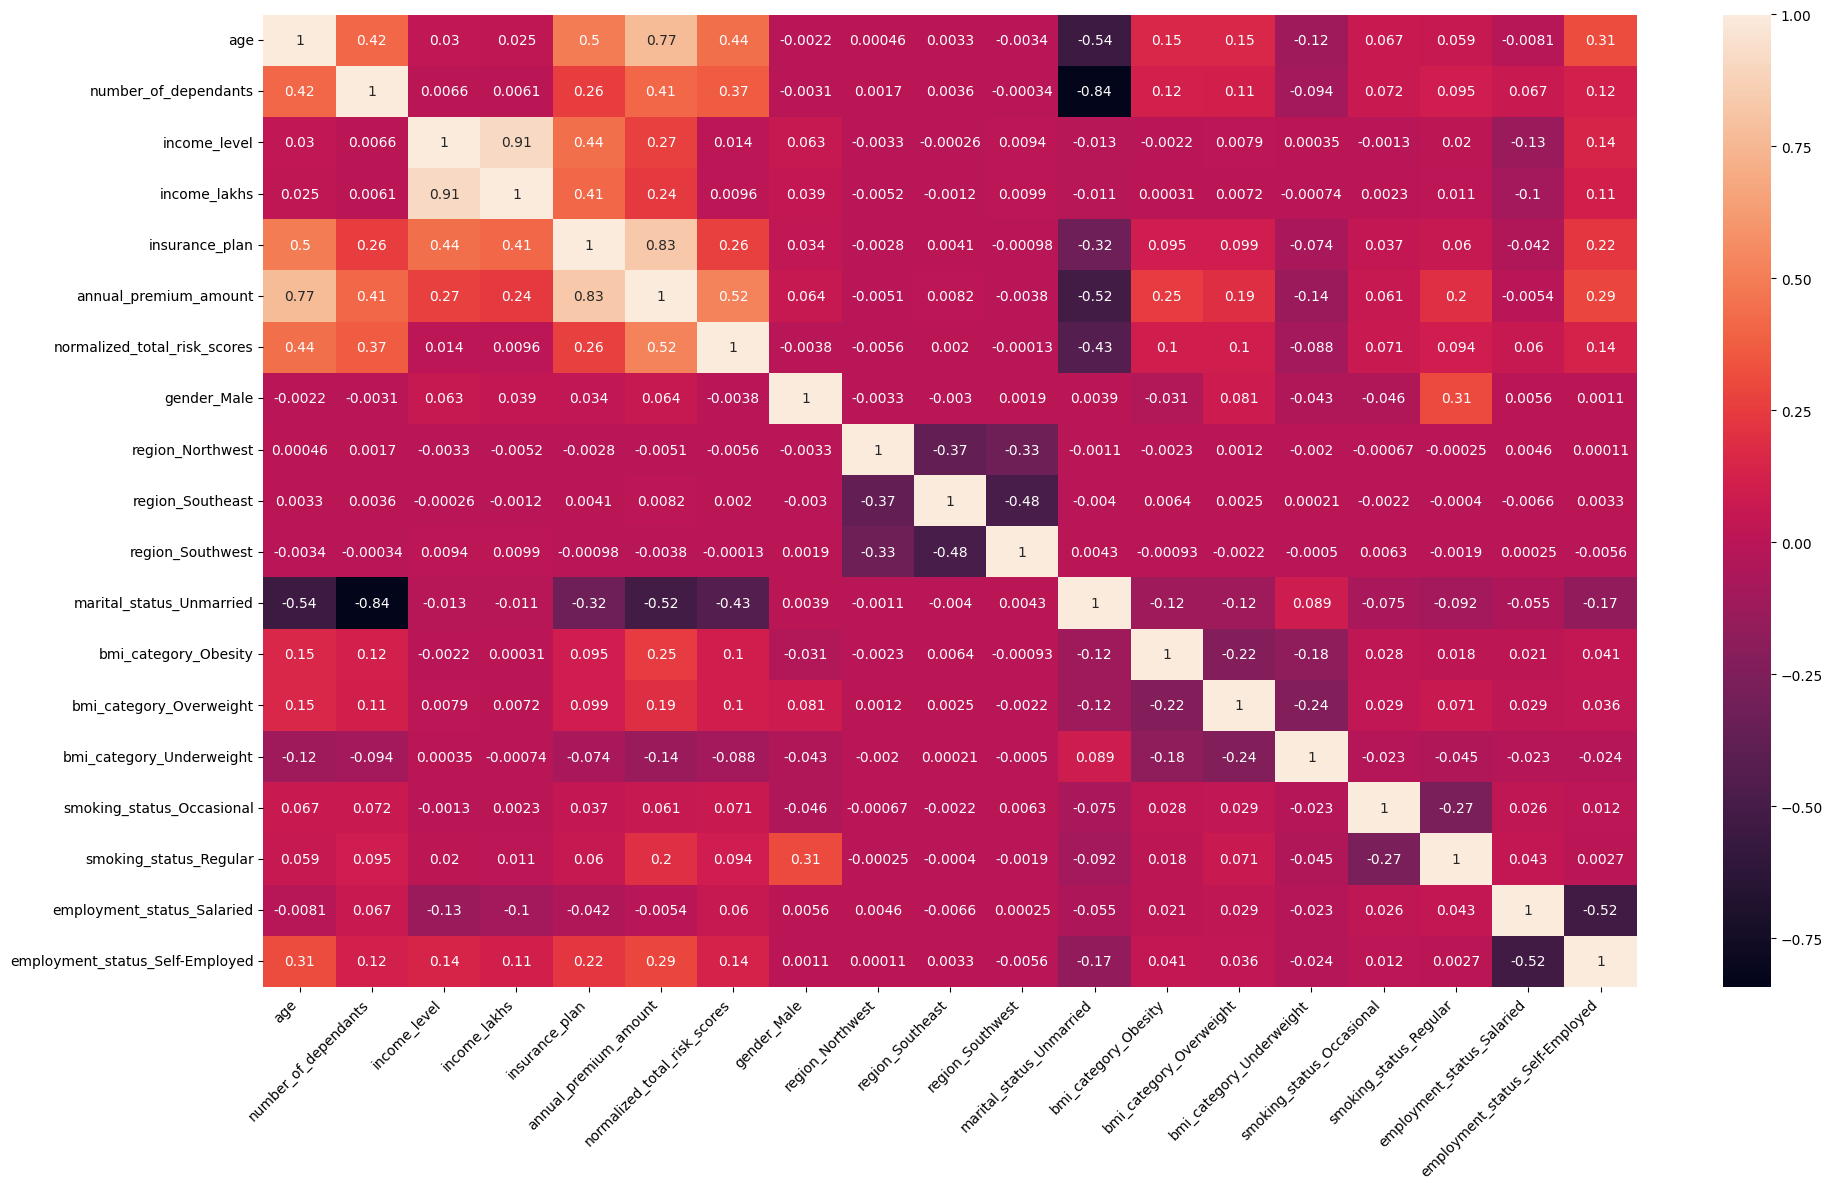

In [ ]:
Correlation_metrix = premiums_data3.corr()

plt.figure(figsize=(20,12))
sns.heatmap(Correlation_metrix, annot=True)
plt.xticks(rotation=45, ha = 'right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
X = premiums_data3.drop('annual_premium_amount', axis=1)
y = premiums_data3['annual_premium_amount']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

cols_to_scaler = ['age', 'income_lakhs','income_level', 'insurance_plan', 'number_of_dependants']
scaler = MinMaxScaler()
X[cols_to_scaler] = scaler.fit_transform(X[cols_to_scaler])
X.head()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_total_risk_scores,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.000000,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.000000,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.333333,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,1.000000,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,1.000000,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


In [ ]:
X.describe()

,age,number_of_dependants,income_level,income_lakhs,insurance_plan,normalized_total_risk_scores,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
count,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.00000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000,49908.000000
mean,0.303733,0.343528,0.365900,0.221110,0.397401,0.291831,0.549631,0.20093,0.350385,0.303038,0.513545,0.143183,0.231245,0.155326,0.138274,0.313857,0.419412,0.272041
std,0.253363,0.298406,0.349711,0.223946,0.392459,0.287420,0.497536,0.40070,0.477095,0.459576,0.499822,0.350263,0.421633,0.362219,0.345191,0.464064,0.493468,0.445015
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.074074,0.000000,0.000000,0.060606,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.240741,0.400000,0.333333,0.161616,0.500000,0.357143,1.000000,0.00000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.600000,0.666667,0.303030,0.500000,0.428571,1.000000,0.00000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def calculate_vif(data):
    vif = pd.DataFrame()
    vif['variables'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif

In [ ]:
calculate_vif(X)

,variables,VIF
0,age,4.567634
1,number_of_dependants,4.534650
2,income_level,12.450675
3,income_lakhs,11.183367
4,insurance_plan,3.584752
5,normalized_total_risk_scores,2.687610
6,gender_Male,2.421496
7,region_Northwest,2.102556
8,region_Southeast,2.922414
9,region_Southwest,2.670666


In [ ]:
calculate_vif(X.drop('income_level', axis=1))

,variables,VIF
0,age,4.545825
1,number_of_dependants,4.526598
2,income_lakhs,2.480563
3,insurance_plan,3.445682
4,normalized_total_risk_scores,2.687326
5,gender_Male,2.409980
6,region_Northwest,2.100789
7,region_Southeast,2.919775
8,region_Southwest,2.668314
9,marital_status_Unmarried,3.393718


In [ ]:
X_reduced = X.drop('income_level', axis=1)
X_reduced.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_total_risk_scores,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
0,0.148148,0.0,0.050505,0.0,0.428571,1,1,0,0,1,0,0,0,0,0,1,0
1,0.203704,0.4,0.050505,0.0,0.428571,0,0,1,0,0,1,0,0,0,1,1,0
2,0.574074,0.4,0.191919,0.5,0.428571,0,0,0,0,0,0,0,0,0,0,0,1
3,0.222222,0.6,0.767677,1.0,0.000000,0,0,1,0,0,0,0,0,0,0,1,0
4,0.000000,0.0,0.989899,0.5,0.428571,1,0,0,0,1,0,1,0,0,1,0,1


# Model Training


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression # Import the function



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=10)

print('X train Shape', X_train.shape)
print('X test Shape', X_test.shape)
print('y train Shape', y_train.shape)
print('y test Shape', y_test.shape)

X train Shape (34935, 17)
X test Shape (14973, 17)
y train Shape (34935,)
y test Shape (14973,)


In [ ]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)
train_score = model_lr.score(X_train, y_train)
test_score = model_lr.score(X_test, y_test)
print('Train Score', train_score)
print('Test Score', test_score)



Train Score 0.9282143576916762
Test Score 0.9280547230217837


In [ ]:
model_lr.coef_

array([11160.92646188,  -676.44399066,  -514.22981577, 12557.01293645,
        4810.35770228,   168.64666183,   -35.7192924 ,    39.96512973,
         -24.65292857,  -935.76061134,  3387.91145477,  1599.36226775,
         391.1713038 ,   735.91227798,  2234.8047119 ,   155.9846743 ,
         415.90397305])

In [ ]:
model_lr.intercept_

4824.300272127095

In [ ]:
X_test.columns

Index(['age', 'number_of_dependants', 'income_lakhs', 'insurance_plan',
       'normalized_total_risk_scores', 'gender_Male', 'region_Northwest',
       'region_Southeast', 'region_Southwest', 'marital_status_Unmarried',
       'bmi_category_Obesity', 'bmi_category_Overweight',
       'bmi_category_Underweight', 'smoking_status_Occasional',
       'smoking_status_Regular', 'employment_status_Salaried',
       'employment_status_Self-Employed'],
      dtype='object')

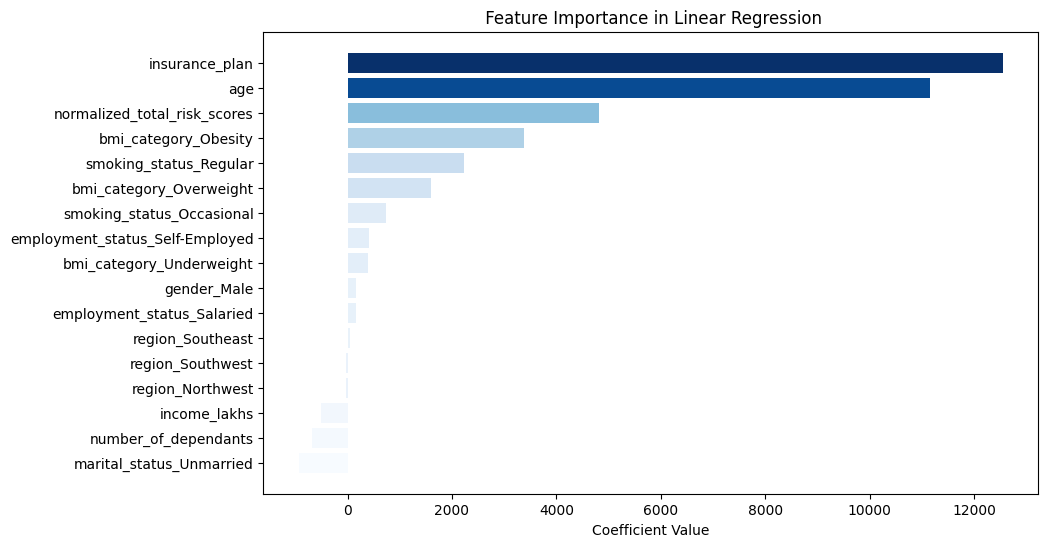

In [ ]:
import matplotlib.cm as cm




feature_importance = model_lr.coef_
coef_df = pd.DataFrame(feature_importance, index=X_test.columns, columns=['Coefficient'])
coef_df = coef_df.sort_values(by='Coefficient', ascending= True)

plt.figure(figsize=(10, 6))
# Added width=0.8 to specify the width of the bars
norm = plt.Normalize(coef_df['Coefficient'].min(), coef_df['Coefficient'].max())

colors = cm.ScalarMappable(norm=norm, cmap='Blues').to_rgba(coef_df['Coefficient'])
plt.barh(y=coef_df.index, width=coef_df['Coefficient'], color = colors )
plt.xlabel('Coefficient Value')
plt.title(' Feature Importance in Linear Regression')
plt.show()



In [ ]:
from sklearn.linear_model import Ridge

model_rg = Ridge()
model_rg.fit(X_train, y_train)
train_score = model_rg.score(X_train, y_train)
test_score = model_rg.score(X_test, y_test)
print('Train Score', train_score)
print('Test Score', test_score)

Train Score 0.9282143198366275
Test Score 0.9280541644640345


In [ ]:
from sklearn.linear_model import Lasso

model_rg = Ridge()
model_rg.fit(X_train, y_train)
train_score = model_rg.score(X_train, y_train)
test_score = model_rg.score(X_test, y_test)
print('Train Score', train_score)
print('Test Score', test_score)

Train Score 0.9282143198366275
Test Score 0.9280541644640345


In [ ]:
from xgboost import XGBRegressor
model_xgb = XGBRegressor()
model_xgb.fit(X_train, y_train)
train_score = model_xgb.score(X_train, y_train)
test_score = model_xgb.score(X_test, y_test)
print('Train Score', train_score)
print('Test Score', test_score)


Train Score 0.9860964164832711
Test Score 0.9809534637207582


In [ ]:
from sklearn.metrics import mean_squared_error # import the missing module
y_pred = model_xgb.predict(X_test)
mse_lr = mean_squared_error(y_test, y_pred)
rmse_lr = np.sqrt(mse_lr)
print(" xgboost Regressor:" "RMSE:", rmse_lr, "mse:", mse_lr)

 xgboost Regressor:RMSE: 1169.412541527082 mse: 1367525.6922808294


**After applying the XGBoost Regressor, we observed improvements in both the training and test sets.**

**Further Model Fine tunning , select the best hyperparameter.**


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV # import the missing module
model_xgb = XGBRegressor()
param_grid = {
   'n_estimators': [20,40,60],
   'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter = 10, cv=3, scoring='r2', random_state =42)
random_search.fit(X_train, y_train)
random_search.best_score_

0.9814910699776668

In [ ]:
random_search.best_params_

{'n_estimators': 60, 'max_depth': 5, 'learning_rate': 0.1}

In [ ]:
best_model = random_search.best_estimator_


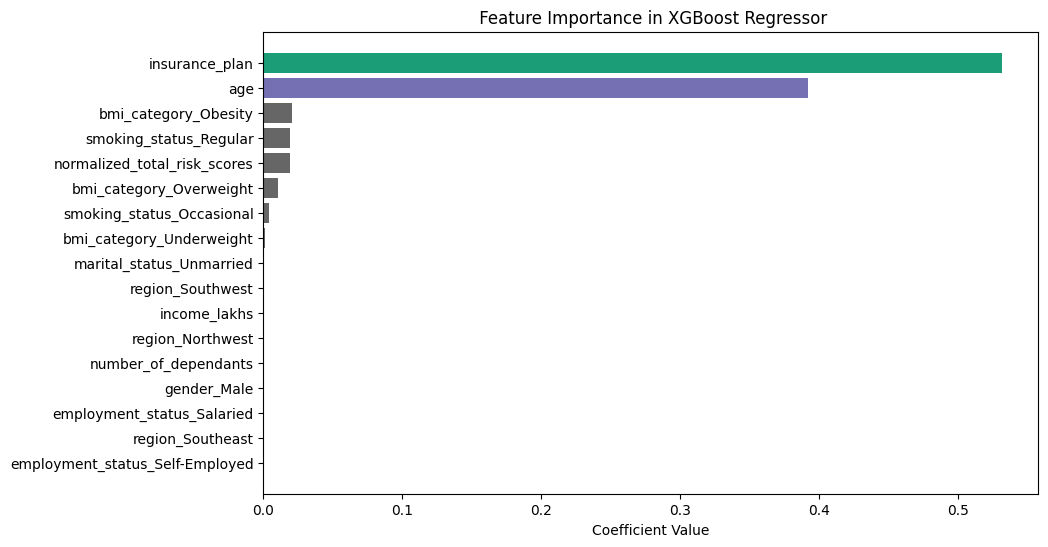

In [ ]:

feature_importance = best_model.feature_importances_
coef_df = pd.DataFrame(feature_importance, index=X_test.columns, columns=['Coefficient'])
coef_df = coef_df.sort_values(by='Coefficient', ascending= True)

plt.figure(figsize=(10, 6))
# Added width=0.8 to specify the width of the bars
norm = plt.Normalize(coef_df['Coefficient'].min(), coef_df['Coefficient'].max())

colors = cm.ScalarMappable(norm=norm, cmap='Dark2_r').to_rgba(coef_df['Coefficient'])
plt.barh(y=coef_df.index, width=coef_df['Coefficient'], color = colors )
plt.xlabel('Coefficient Value')
plt.title(' Feature Importance in XGBoost Regressor')
plt.show()



# Error Analysis

In [ ]:
y_pred = best_model.predict(X_test)
residuals = y_pred - y_test
residuals_pct = residuals*100/y_test


results_df = pd.DataFrame({'actual': y_test, 'predicted': y_pred , 'diff': residuals, 'diff_pct' : residuals_pct}) # changed 'residulas' to 'residuals'
results_df.head()

,actual,predicted,diff,diff_pct
3598,20554,20427.820312,-126.179688,-0.613894
35794,29647,29448.306641,-198.693359,-0.670197
43608,20560,20547.001953,-12.998047,-0.063220
42730,5018,7211.130371,2193.130371,43.705268
18936,8929,8108.933105,-820.066895,-9.184308


<Axes: xlabel='diff_pct', ylabel='Count'>

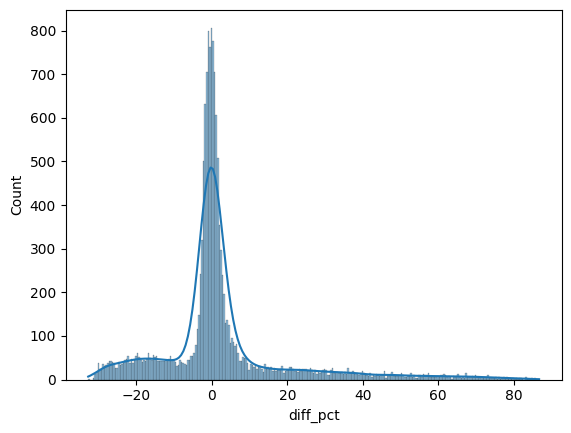

In [ ]:
sns.histplot(results_df['diff_pct'], kde=True )

In [ ]:
extreme_error_threshold = 10
extreme_results_df = results_df[np.abs(results_df['diff_pct']) >extreme_error_threshold ]
extreme_results_df

,actual,predicted,diff,diff_pct
42730,5018,7211.130371,2193.130371,43.705268
20029,5140,6642.828125,1502.828125,29.237901
4294,9631,7039.445312,-2591.554688,-26.908469
44419,4687,6650.945312,1963.945312,41.901970
6707,8826,10039.374023,1213.374023,13.747723
...,...,...,...,...
8767,8113,6528.779785,-1584.220215,-19.526935
25179,9944,7030.786621,-2913.213379,-29.296192
21592,8332,10616.982422,2284.982422,27.424177
49274,5571,6795.341797,1224.341797,21.977056


In [ ]:
results_df.shape

(14973, 4)

In [ ]:
extreme_errors_pct = extreme_results_df.shape[0]*100/results_df.shape[0]
extreme_errors_pct

29.62666132371602

In [ ]:
results_df[np.abs(results_df['diff_pct'])> 50 ].sort_values(by='diff_pct', ascending=False)


,actual,predicted,diff,diff_pct
36269,3501,6536.740234,3035.740234,86.710661
48801,3516,6528.779785,3012.779785,85.687707
42342,3521,6536.740234,3015.740234,85.650106
18564,3523,6536.740234,3013.740234,85.544713
7988,3527,6528.779785,3001.779785,85.108585
...,...,...,...,...
32671,4656,6986.604980,2330.604980,50.055949
33915,5068,7604.756348,2536.756348,50.054387
45659,4633,6951.919434,2318.919434,50.052222
12898,4428,6642.828125,2214.828125,50.018702


In [ ]:
X_test.index

Index([ 3598, 35794, 43608, 42730, 18936, 45416, 20029,  4294, 39145,  3152,
       ...
        4554,  9086,  8767,   603, 25179,  5621,  6069, 21592, 49274, 27977],
      dtype='int64', length=14973)

In [ ]:
extreme_results_df.index

Index([42730, 20029,  4294, 44419,  6707, 11728, 15740, 35065,  9654, 22679,
       ...
       36158, 30386, 21184, 45020,  8249,  8767, 25179, 21592, 49274, 27977],
      dtype='int64', length=4436)

In [ ]:
extreme_errors_df = X_test.loc[extreme_results_df.index]
extreme_errors_df.head()

,age,number_of_dependants,income_lakhs,insurance_plan,normalized_total_risk_scores,gender_Male,region_Northwest,region_Southeast,region_Southwest,marital_status_Unmarried,bmi_category_Obesity,bmi_category_Overweight,bmi_category_Underweight,smoking_status_Occasional,smoking_status_Regular,employment_status_Salaried,employment_status_Self-Employed
42730,0.092593,0.2,0.131313,0.0,0.428571,1,0,0,0,1,0,1,0,0,0,0,0
20029,0.018519,0.2,0.030303,0.0,0.000000,0,1,0,0,1,0,0,1,0,0,1,0
4294,0.000000,0.2,0.020202,0.0,0.000000,1,0,0,1,1,0,1,0,0,0,0,0
44419,0.055556,0.0,0.242424,0.0,0.000000,0,0,0,0,1,0,0,1,0,0,0,0
6707,0.111111,0.2,0.070707,0.5,0.000000,1,0,0,0,1,0,0,1,0,0,0,0


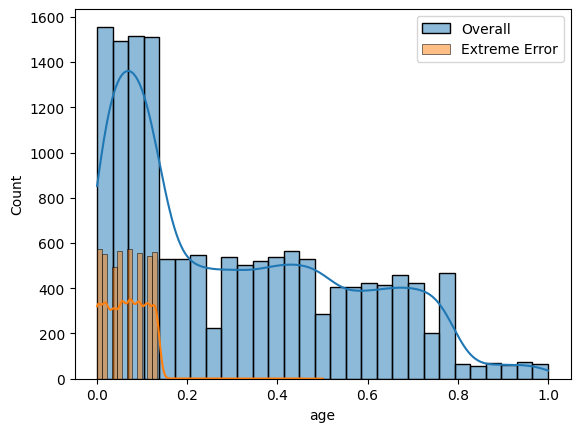

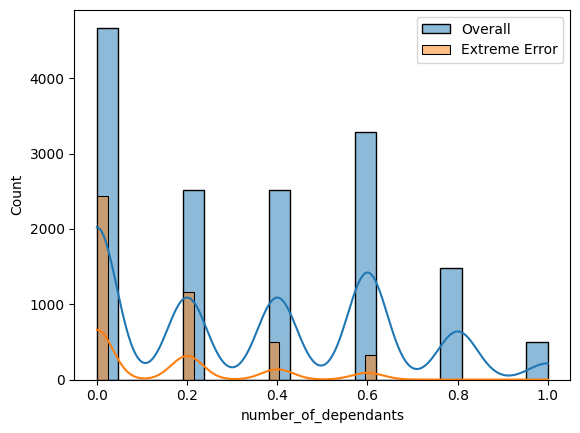

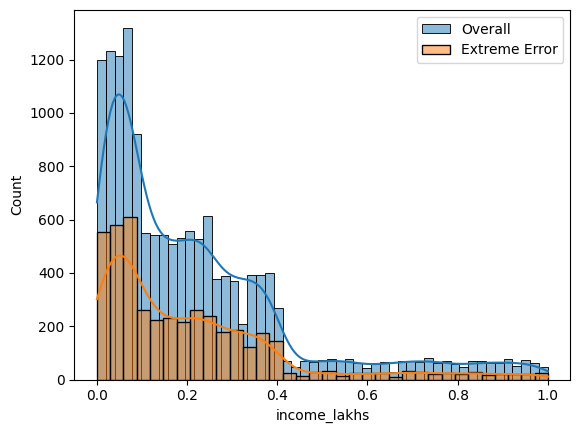

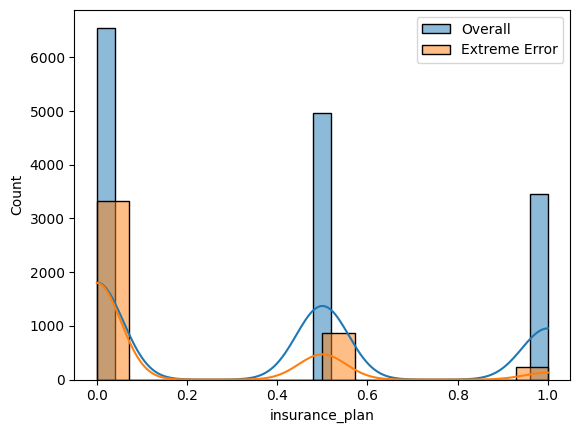

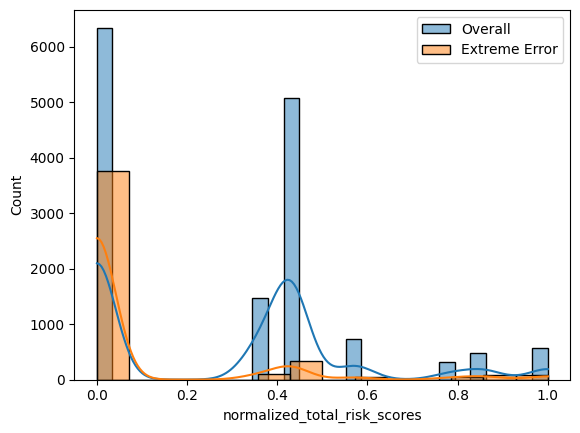

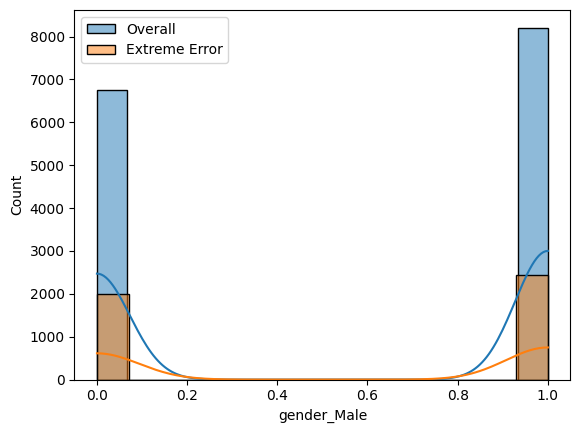

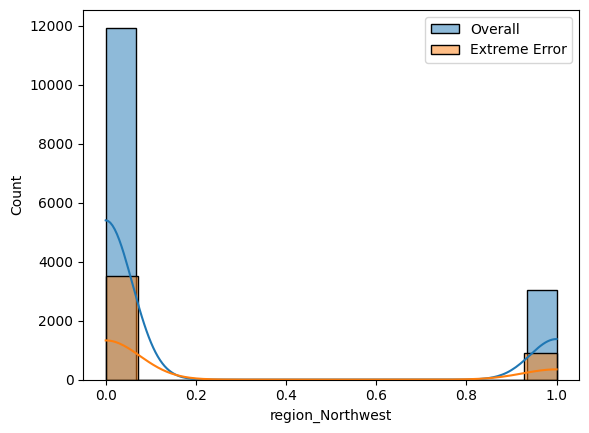

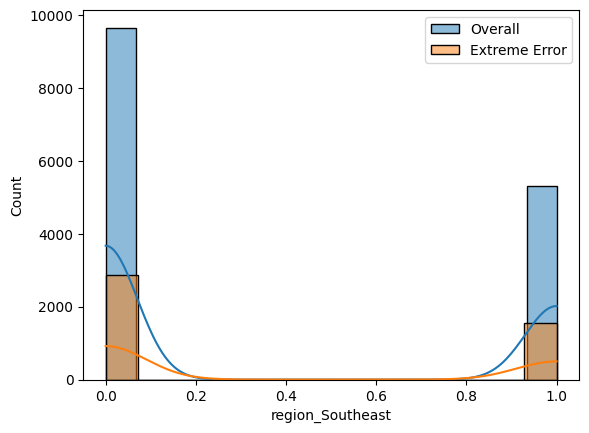

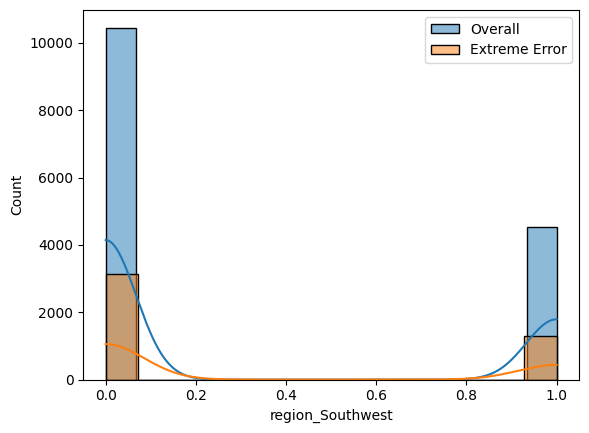

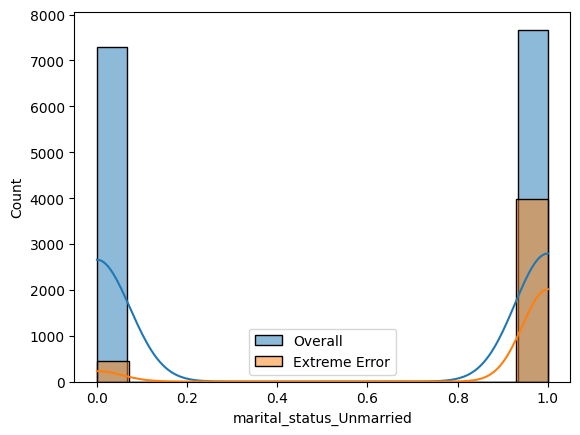

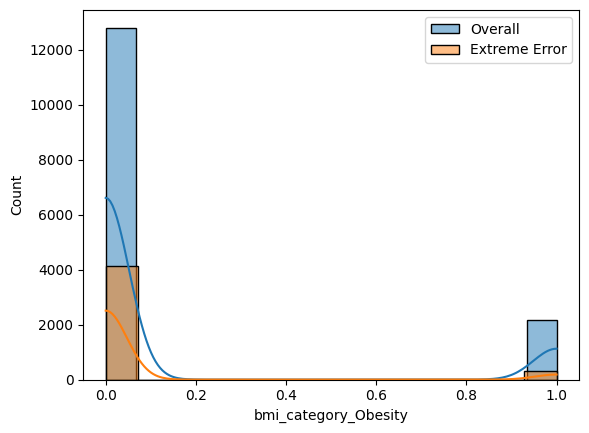

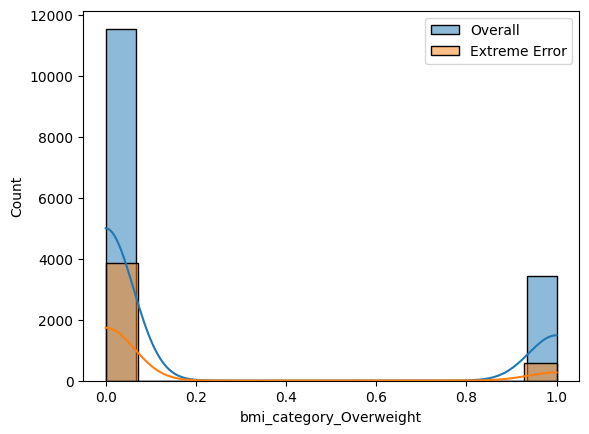

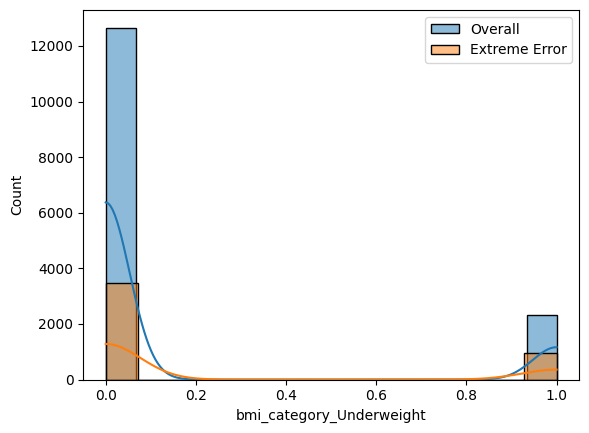

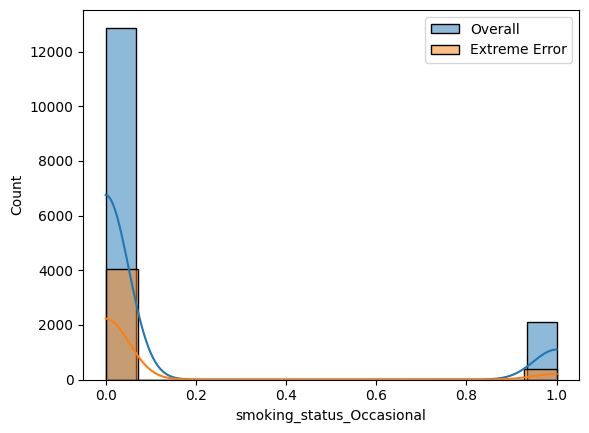

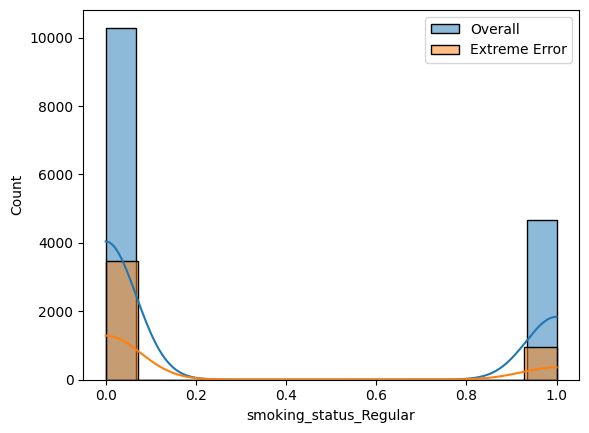

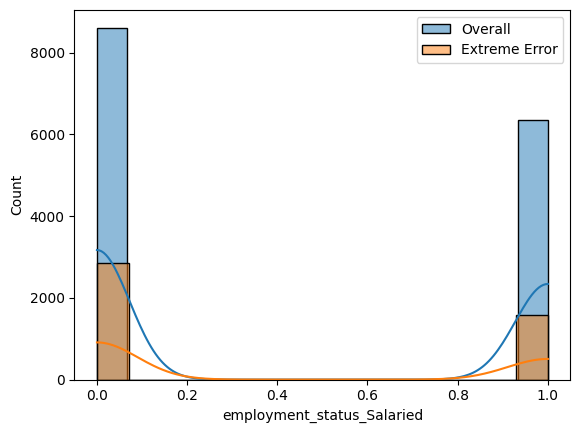

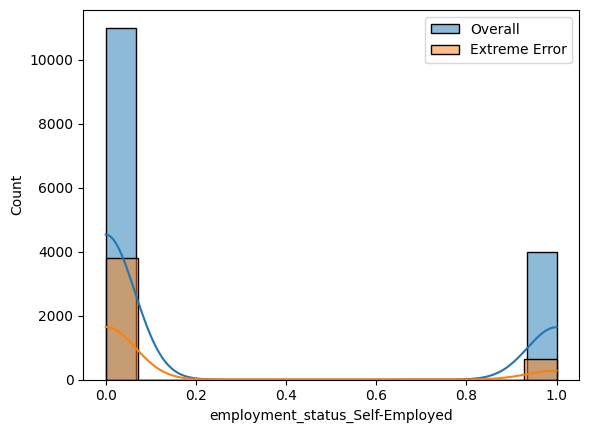

In [ ]:
for feature in X_test.columns: # Changed from X.columns to X_test.columns
  sns.histplot(X_test[feature], label="Overall", alpha=0.5, kde=True )
  sns.histplot(extreme_errors_df[feature], label = "Extreme Error", kde=True )
  plt.legend()
  plt.show()


In [ ]:
cols_to_scaler

['age',
 'income_lakhs',
 'income_level',
 'insurance_plan',
 'number_of_dependants']

In [ ]:
extreme_errors_df['income_level'] = -1 # Add quotes around income_level to make it a string literal

<Axes: xlabel='age', ylabel='Count'>

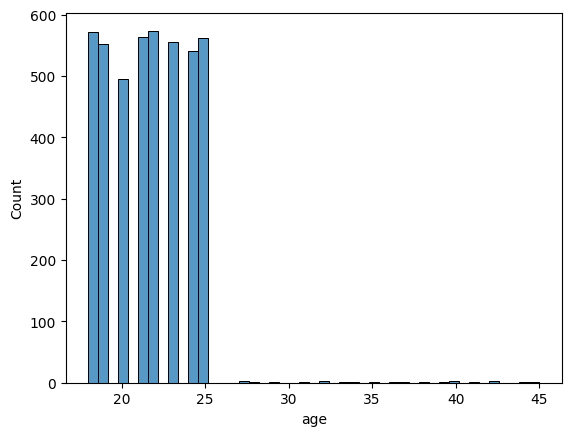

In [ ]:
df_reversed =pd.DataFrame()
df_reversed[cols_to_scaler] = scaler.inverse_transform(extreme_errors_df[cols_to_scaler])


sns.histplot(df_reversed['age'] )

In [ ]:
df_reversed.describe()

,age,income_lakhs,income_level,insurance_plan,number_of_dependants
count,4436.000000,4436.000000,4436.0,4436.000000,4436.000000
mean,21.574842,21.402615,-2.0,1.303652,0.713255
std,2.525190,20.728953,0.0,0.565043,0.941497
min,18.000000,1.000000,-2.0,1.000000,0.000000
25%,19.000000,6.000000,-2.0,1.000000,0.000000
50%,22.000000,15.000000,-2.0,1.000000,0.000000
75%,24.000000,30.000000,-2.0,1.000000,1.000000
max,45.000000,100.000000,-2.0,3.000000,5.000000


In [ ]:
df_reversed['age'].quantile(0.99)

25.0

# Model Segmentation